In [ ]:
# Install dependencies
!pip install seaborn --quiet
!pip install scikit-learn --quiet

# **Import Libraries**

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from IPython.display import display, Markdown
sns.set_style("whitegrid")

# **Load Dataset**

In [ ]:

display(Markdown("## Loading Dataset"))
from google.colab import files
import io
uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]), encoding='latin-1')
df = df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'message'})
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
display(df.head())

## Loading Dataset

Saving spam.csv to spam.csv


,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## **Exploratory Data Analysis**

## Exploratory Data Analysis (EDA)

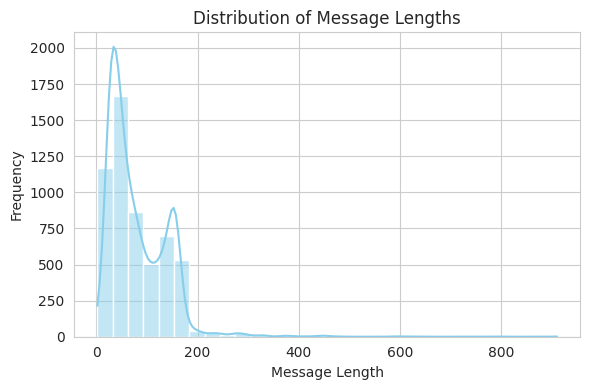

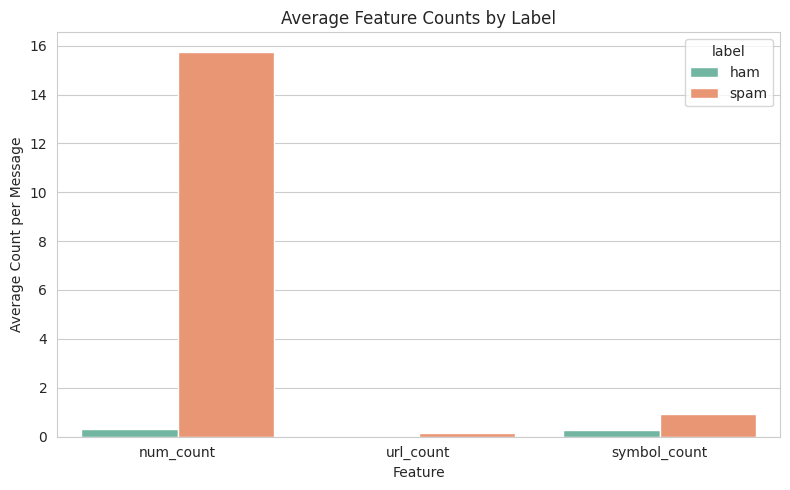

In [ ]:
# EDA - Exploratory Data Analysis (Non-biased View)
display(Markdown("## Exploratory Data Analysis (EDA)"))

# Add a new column for message length
df['msg_length'] = df['message'].apply(len)

# Show message length distribution (all messages)
plt.figure(figsize=(6, 4))
sns.histplot(df['msg_length'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Message Lengths")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

import re

df['num_count'] = df['message'].apply(lambda x: len(re.findall(r'\d', x)))
df['url_count'] = df['message'].apply(lambda x: len(re.findall(r'(http[s]?://|www\.)', x)))
df['symbol_count'] = df['message'].apply(lambda x: len(re.findall(r'[$@#%*!]', x)))

# Calculate average values
avg_counts = df.groupby('label')[['num_count', 'url_count', 'symbol_count']].mean().reset_index()
avg_counts = avg_counts.melt(id_vars='label', var_name='Feature', value_name='Average Count')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_counts, x='Feature', y='Average Count', hue='label', palette='Set2')
plt.title("Average Feature Counts by Label")
plt.xlabel("Feature")
plt.ylabel("Average Count per Message")
plt.tight_layout()
plt.show()

# **Preprocessing and Feature extraction**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['message'],
    df['label_num'],
    test_size=0.2,
    random_state=42
)
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# **NAIVE BAYES**

### Model: Naive Bayes

Accuracy: 0.9758
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.85      0.90       150

    accuracy                           0.98      1115
   macro avg       0.97      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



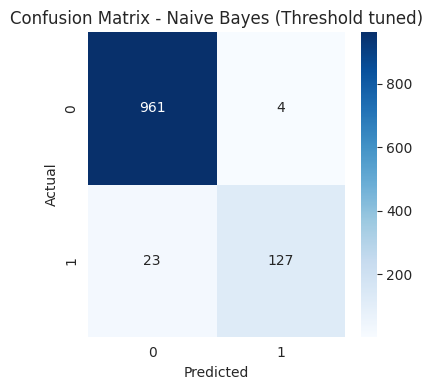

In [ ]:
display(Markdown("### Model: Naive Bayes"))
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

y_probs_nb = nb.predict_proba(X_test_tfidf)[:, 1]
threshold = 0.3
y_pred_nb = (y_probs_nb >= threshold).astype(int)

print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(classification_report(y_test, y_pred_nb))

plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes (Threshold tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# **Logistic Regression**

### Model: **Logistic Regression**

Accuracy: 0.9776
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.93      0.91      0.92       150

    accuracy                           0.98      1115
   macro avg       0.96      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



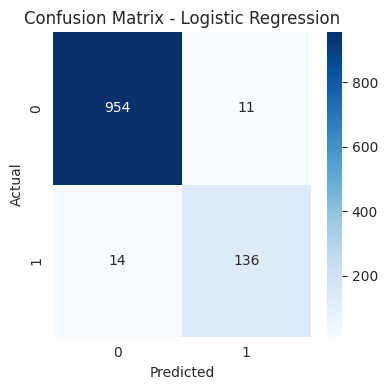

In [ ]:
display(Markdown("### Model: **Logistic Regression**"))
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# **K-Nearest Neighbors (KNN)**

### Model: **K-Nearest Neighbors (KNN)**

Accuracy: 0.9372
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       965
           1       1.00      0.53      0.70       150

    accuracy                           0.94      1115
   macro avg       0.97      0.77      0.83      1115
weighted avg       0.94      0.94      0.93      1115



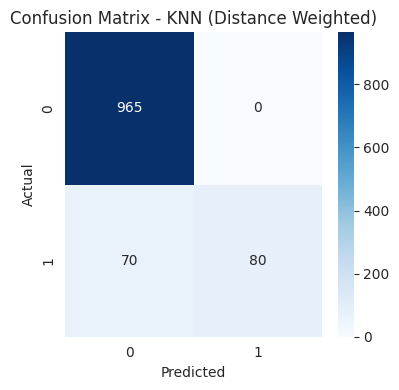

In [ ]:
display(Markdown("### Model: **K-Nearest Neighbors (KNN)**"))

# Use distance-weighted KNN to handle class imbalance more softly
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train_tfidf, y_train)
y_pred_knn = knn.predict(X_test_tfidf)

print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN (Distance Weighted)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# **Linear SVM**

### Model: **Linear SVM**

Accuracy: 0.9821
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.95      0.91      0.93       150

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



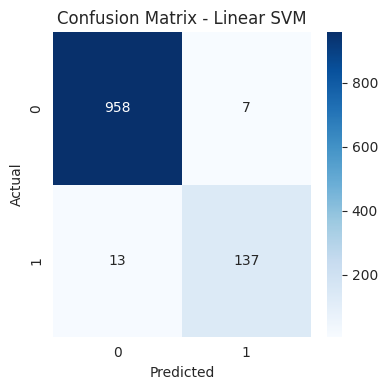

In [ ]:
display(Markdown("### Model: **Linear SVM**"))
svm = LinearSVC(class_weight='balanced')
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)

print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Linear SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# **Accuracy Comparison Chart**

## Evaluation Metrics Comparison of All Models

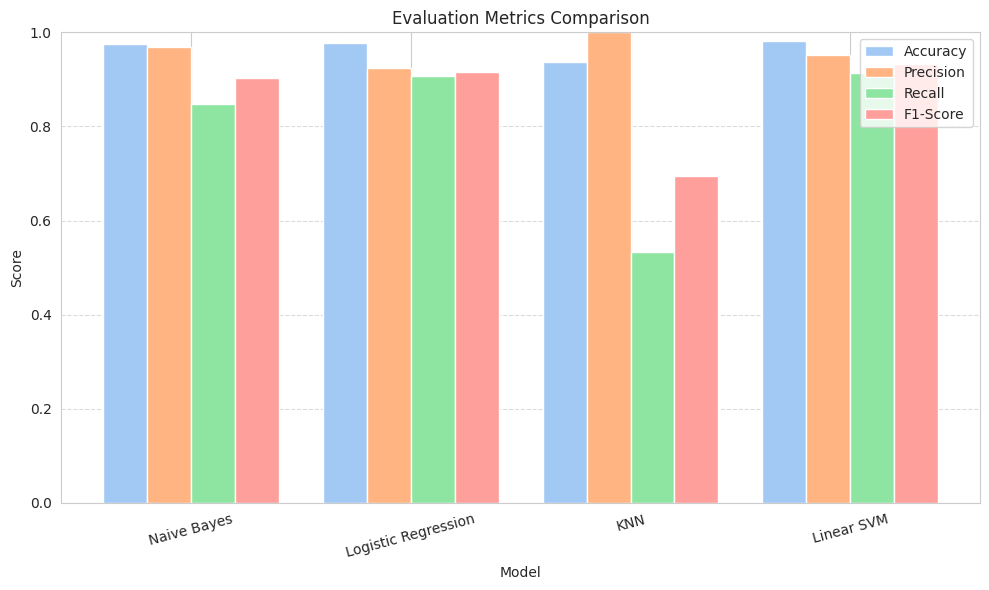

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Markdown

# Show title
display(Markdown("## Evaluation Metrics Comparison of All Models"))

# Model names
model_names = ['Naive Bayes', 'Logistic Regression', 'KNN', 'Linear SVM']

# Compute metrics for each model
metrics = {
    'Accuracy': [
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_svm)
    ],
    'Precision': [
        precision_score(y_test, y_pred_nb, pos_label=1),
        precision_score(y_test, y_pred_lr, pos_label=1),
        precision_score(y_test, y_pred_knn, pos_label=1),
        precision_score(y_test, y_pred_svm, pos_label=1)
    ],
    'Recall': [
        recall_score(y_test, y_pred_nb, pos_label=1),
        recall_score(y_test, y_pred_lr, pos_label=1),
        recall_score(y_test, y_pred_knn, pos_label=1),
        recall_score(y_test, y_pred_svm, pos_label=1)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_nb, pos_label=1),
        f1_score(y_test, y_pred_lr, pos_label=1),
        f1_score(y_test, y_pred_knn, pos_label=1),
        f1_score(y_test, y_pred_svm, pos_label=1)
    ]
}

# Plotting grouped bar chart
x = np.arange(len(model_names))  # label locations
width = 0.2  # width of each bar
colors = sns.color_palette('pastel', len(metrics))

plt.figure(figsize=(10, 6))

# Plot each metric
for i, (metric_name, scores) in enumerate(metrics.items()):
    plt.bar(x + i*width, scores, width=width, label=metric_name, color=colors[i])

# Formatting
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Evaluation Metrics Comparison')
plt.xticks(x + width * 1.5, model_names, rotation=15)
plt.ylim(0., 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **User Input Data Prediction**

In [ ]:
results = {
    'Naive Bayes': {'Model': nb},
    'Logistic Regression': {'Model': lr},
    'KNN': {'Model': knn},
    'Linear SVM': {'Model': svm}
}

user_input = input("Enter a message to check if it's Spam or Ham:\n")
user_input_tfidf = vectorizer.transform([user_input])

print("\nPrediction Results:")
for name, res in results.items():
    prediction = res['Model'].predict(user_input_tfidf)[0]
    label = "Ham" if prediction == 0 or prediction == 'ham' else "Spam"
    print(f"{name}: {label}")

Enter a message to check if it's Spam or Ham:
Congratulations! You have won 50,000 cash prize 🏆

Prediction Results:
Naive Bayes: Spam
Logistic Regression: Spam
KNN: Ham
Linear SVM: Spam
